# Simulación de una ruleta de casino básica

Un apostador, con un **capital fijo** $C_0$, decide apostar en una ruleta básica de casino (perfectamente nivelada) a los mismos números y el color en cada ronda hasta no tener el capital necesario para apostar en la siguiente ronda.  

## Objetivos
**Objetivo general**
 - *Analizar por medio de simulaciones el comportamiento del juego de una ruleta de casino básica que depende de la apuesta y la aleatoriedad de la ruleta.*
 
**Objetivos específicos**
   - *Simular el comportamiento aleatorio de la ruleta.*
   - *Comparar el resultado de la ruleta con la apuesta dada.*
   - *Actualizar el capital del apostador después de cada juego.*
   - *Simular una gran cantidad de escenarios para la apuesta definida.*
   - *Representar el número de rondas que un apostador juega antes de ya no poder continuar con la siguiente ronda.*
   - *Calcular el promedio de rondas jugadas bajo las condiciones anteriores.*

## Obtención del modelo

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
numeros_verdes = [0]
numeros_rojos = [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]
numeros_negros = [2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35]

In [4]:
# Datos iniciales
C0 = 1500   # Capital inicial
AN = 0      # Cantidad a apostar para los números
AC = 200    # Cantidad a apostar al color

El apostador decide los números y el color a apostar

In [5]:
# Elije el color que deseas apostar ('rojo'/'negro'):
color_apostar = 'negro'

# Elije los números que deseas apostar:
numeros_apostar = []

Por medio de la función se asignan los números correspondientes al color elegido:


In [6]:
def juego_color(color_apostar):
    c = color_apostar
    if c == 'rojo':
        C = numeros_rojos
    elif c == 'negro':
        C = numeros_negros
    elif c == '':
        C = 'No hubo apusta para los colores'
    else:
        C='Valor no válido'
    return C

juego_color(color_apostar)

[2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]

La siguiente función compara el resultado de la ruleta con los números y el color apostado:

In [7]:
def ganar():
    N = []
    CA = []
    resultado=np.random.randint(0,36)
        
    if numeros_apostar != [] and color_apostar != '':
        for i in range (len(numeros_apostar)):
            if resultado == numeros_apostar[i]:
                N.append(1)
            else:
                N.append(0)
        if 1 in N:
            GN = "Ganaste con el número " + str(resultado)
        else:
            GN = "Perdiste en la apuesta individual"

        for i in range (len(juego_color(color_apostar))):
            if resultado == juego_color(color_apostar)[i]:
                CA.append(1)
            else:
                CA.append(0)
        if 1 in CA:
            GC = "Ganaste con el número " + str(resultado) + " de color " +  color_apostar
        else:
            GC = "Perdiste en la apuesta por color"
        resultado_ruleta = 'El número de la ruleta es ' + str(resultado)
        
    
    elif numeros_apostar != [] and color_apostar == '':
        for i in range (len(numeros_apostar)):
            if resultado == numeros_apostar[i]:
                N.append(1)
            else:
                N.append(0)
        if 1 in N:
            GN = "Ganaste con el número " + str(resultado)
        else:
            GN = "Perdiste en la apuesta individual"
            
        GC = 'No hubo apuesta para los colores'
        resultado_ruleta = 'El número de la ruleta es ' + str(resultado)
        
    
    elif numeros_apostar == [] and color_apostar != '':
        for i in range (len(juego_color(color_apostar))):
            if resultado == juego_color(color_apostar)[i]:
                CA.append(1)
            else:
                CA.append(0)
        if 1 in CA:
            GC = "Ganaste con el número " + str(resultado) + " de color " +  color_apostar
        else:
            GC = "Perdiste en la apuesta por color"
        GN = 'No hubo apuesta para los números'
        resultado_ruleta = 'El número de la ruleta es ' + str(resultado)
         
    return resultado_ruleta,GN,GC,resultado

ganar()

('El número de la ruleta es 16',
 'No hubo apuesta para los números',
 'Perdiste en la apuesta por color',
 16)

La función actualiza el capital del apostador durante cada ronda, dependiendo del resultado de la ruleta, además de otorgar el número total de rondas jugadas:

In [28]:
def apostador(C0,AN,AC):
    C=[C0] 
    contador = 0
    
    while (C[-1] > 0  and C[-1] >= ((len(numeros_apostar)*AN) + AC)) and not (C[-1] >= C0 + C0/5):
        contador = contador + 1
        
        if ganar()[1] == "Ganaste con el número " + str(ganar()[3]) and ganar()[2] == "Ganaste con el número " + str(ganar()[3]) + " de color " +  color_apostar:
            C.append(C[-1] + (35*AN) - ((len(numeros_apostar)-1)*AN) + (AC))
            
        elif ganar()[1] == "Ganaste con el número " + str(ganar()[3]) and ganar()[2] == "Perdiste en la apuesta por color":
            C.append(C[-1] + (35*AN) - ((len(numeros_apostar)-1)*AN) - (AC))
            
        elif ganar()[1] == "Perdiste en la apuesta individual" and ganar()[2] == "Ganaste con el número " + str(ganar()[3]) + " de color " +  color_apostar:
            C.append(C[-1] - (len(numeros_apostar)*AN) + (AC))
            
        elif ganar()[1] == "Perdiste en la apuesta individual" and ganar()[2] == "Perdiste en la apuesta por color":
            C.append(C[-1] - (len(numeros_apostar)*AN) - (AC))
            
        elif ganar()[1] == 'No hubo apuesta para los números' and ganar()[2] == "Ganaste con el número " + str(ganar()[3]) + " de color " +  color_apostar:
            C.append(C[-1] + AC)
            
        elif ganar()[1] == 'No hubo apuesta para los números' and ganar()[2] == "Perdiste en la apuesta por color":
            C.append(C[-1] - AC)
            
        elif ganar()[1] == "Ganaste con el número " + str(ganar()[3]) and ganar()[2] == 'No hubo apuesta para los colores':
            C.append(C[-1] + (35*AN) - ((len(numeros_apostar)-1)*AN))
            
        elif ganar()[1] == "Perdiste en la apuesta individual" and ganar()[2] == 'No hubo apuesta para los colores':
            C.append(C[-1] - (len(numeros_apostar)*AN))
            
    return C,len(C)

apostador(C0,AN,AC)

([1500, 1300, 1100, 900, 700, 500, 300, 100], 8)

## Solución del problema


Se muestra la gráfica donde se simulan $10^4$ escenarios:

In [32]:
n = 10**3

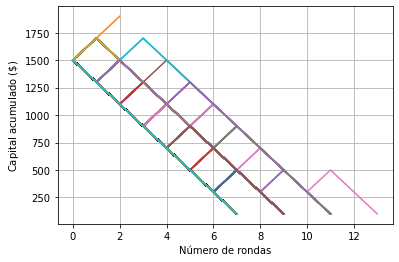

In [33]:
for j in range (n):
    C = apostador(C0,AN,AC)[0]
    plt.plot(C)

plt.xlabel('Número de rondas')
plt.ylabel('Capital acumulado ($ \$ $)')
plt.grid()

El histograma representa el número de rondas que un jugador puede apostar antes de que su capital no sea suficiente para seguir apostando:

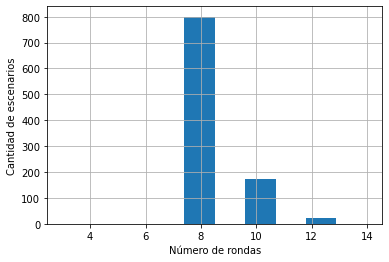

In [38]:
Apostadores = []
for j in range (n):
    Apostadores.append(apostador(C0,AN,AC)[1])
    
plt.hist(Apostadores)
plt.xlabel('Número de rondas')
plt.ylabel('Cantidad de escenarios')
plt.grid()

In [46]:
np.mean(Apostadores)

8.443